# The Sparks Foundation 
## Data Science & Business Analytics Internship 
### Task 02
- **Author**: Taissir Boukrouba
- **Programming Language** : Python 
- **Description** : predict the optimum number of clusters and represent it visually.
- **Model** : K-means since we want to get a specific number of clusters
---
### Steps : 
1. Importing the Libraries
2. Loading the data
3. Data Preprocessing 
4. Evaluation & Model Iteration 
6. Visualizing the results 

For reference check : https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/

<img src="https://s3.amazonaws.com/codecademy-content/programs/machine-learning/k-means/iris.svg" />

## 1- Importing the libraries

In [2]:
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt #plotting the data (visualization)
from sklearn.cluster import KMeans
import seaborn as sns

## 2- Importing the data 

In [3]:
df = pd.read_csv("iris.csv")
print("Our dataframe has {} columns and {} rows".format(df.shape[0],df.shape[1]))

Our dataframe has 150 columns and 6 rows


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.drop(columns=["Id","Species"],inplace=True)

## 3- Data Preprocessing : 
- **Data Cleaning :** Looking for missing values and cleaning them if found
- **Data Tranformation :** Transforming all the categorical object type values to numerical values.

In [7]:
df.isnull().sum() # our data is clean , let's go to the next steps 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [8]:
df.dtypes #all of our data is numerical let's go to the next phase 

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

## 4- Evaluation And Model Iteration 
The elbow plot is an evaluation method the gives us the optimum number of clusters based and the within cluster square of sums which is the sum of the euclidian distance between the data point and the centroid squared 
- The more the number of clusters the lower wcss , but with elbow plot the optimum number lays in the elbow of the plot where : 
1. Going before the elbow means less number of clusters and more wcss where the data points will be far away from the centroid since there is not much centroids 
2. Going After the elbow means more number of clusters and less wcss but there is a curse where if it keeps going until the number of clusters = the number of data points , then each data point will be a centroid to itself (cluster) and wcss = 0

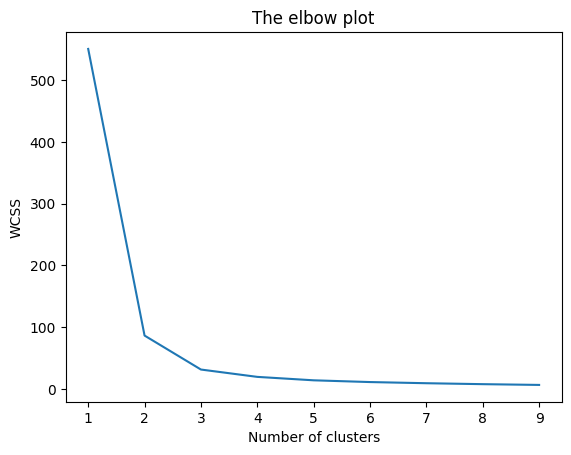

In [9]:
x = df.iloc[:, [2, 3]].values
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # inertia gives us the wccs of each kmeans iteration 
    
plt.plot(range(1, 10), wcss)
plt.title('The elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## 5- Visualizing model's results : 

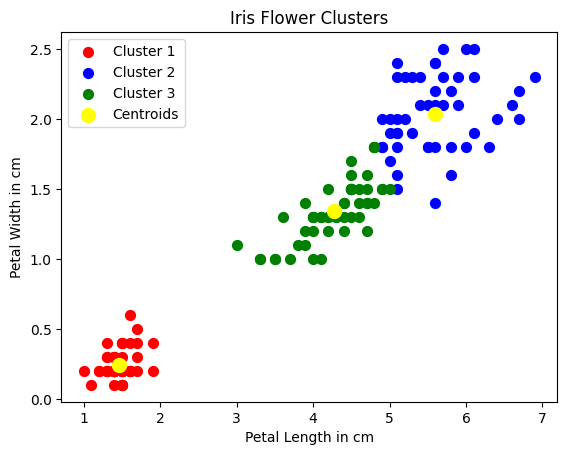

In [11]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend()
plt.show()

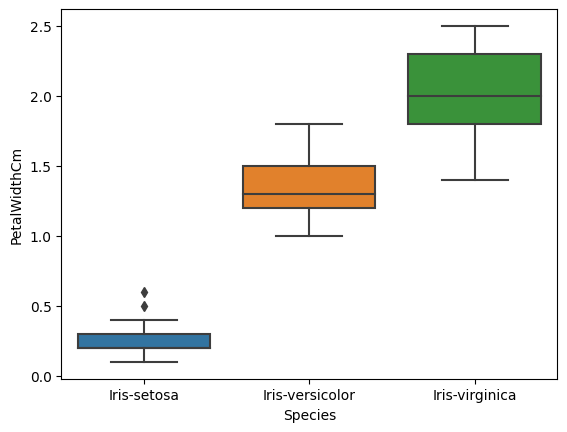

In [12]:
df = pd.read_csv("/Users/tayssirboukrouba/Desktop/TSF-GRIP /TASK 2/iris.csv")
sns.boxplot(x='Species', y='PetalWidthCm', data=df);

## Answering Task's main Question 
what is the optimum number of cluster ? 
- The optimum number of clusters according to the elbow method is `3`